In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.integrate as integrate

# 반응속도론(reaction-kinetics)

동적평형 그래프를 재현하기 위해서 간단하게 화학반응의 속도가 일정하거나(상수), 양에 비례하게 가정했었다.

화학반응속도론은 이런 가정에 더 정확한 이론적 바탕을 제공한다.

## 반응 속도(reaction rate)에 대한 정의

> 단위 시간당 반응물 또는 생성물의 농도 변화

$$\text{A}\longrightarrow\text{B}$$

* 반응물($\text{A}$) 기준: $\text{A}$가 감소하는 속도

$$v=-\frac{\Delta[\text{A}]}{\Delta t}$$

* 생성물($\text{B}$) 기준: $\text{B}$가 증가하는 속도

$$v=\frac{\Delta [B]}{\Delta t}$$

## 반응식의 계수와 속도의 관계

$$2\text{A}\longrightarrow \text{B}$$

이때 속도는 $$v=-\frac 1 2 \frac{\Delta [A]}{\Delta t}=\frac{\Delta [B]}{\Delta t}$$


일반적으로,

$$a\text{A}+b\text{B}\longrightarrow c\text{C}+d\text{D}$$

일때, 

속도 $v$는 다음과 같다.

$$v=-\frac 1 a \frac{\Delta [A]}{\Delta t} = -\frac 1 b \frac{\Delta [B]}{\Delta t}=\frac 1 c \frac{\Delta [C]}{\Delta t}=\frac 1 d \frac{\Delta [D]}{\Delta t}$$

## 속도 법칙

반응 속도를 속도 상수($k$)와 반응물들의 농도의 지수로 표시한다.

$$a\text{A}+b\text{B}\longrightarrow c\text{C}+d\text{D}$$

에서 속도 $v$를 다음과 같이 쓰는 것이다.

$$v=k[\text{A}]^x[\text{B}]^y$$

이때, $x$와 $y$를 반응 차수라 하고 $x+y$를 전체 반응 차수라 한다.

### Example 1-1

$$2\text{A}\longrightarrow\text{B}$$


* 속도조건, $v=0.1[\text{A}]^1=-\frac 1 2 \frac{\Delta [\text{A}]}{\Delta t}= \frac{\Delta[\text{B}]}{\Delta t}$
* 초기조건, $[\text{A}]=1$


In [2]:
t, dt = np.linspace(0, 100, 100000, retstep=True)

A = np.zeros_like(t)
B = np.zeros_like(t)
v = np.zeros_like(t)

k = 0.1

A[0] = 1
B[0] = 0
v[0] = k*A[0]

for i in range(len(t)-1):
    A[i+1] = A[i] - 2 * dt*v[i]
    B[i+1] = B[i] + 1 * dt*v[i]
    v[i+1] = k*A[i]


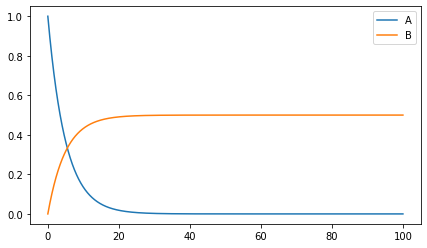

In [3]:
fig, ax = plt.subplots(figsize=(7, 4))

ax.plot(t, A, label="A")
ax.plot(t, B, label="B")

ax.legend()

plt.show()

## 차수에 따른 분류

* 영차 반응(zero-order reactions)

* 일차 반응(first-order reactions)

* 이차 반응(second-order reactions)

+ 유사 n차 반응(pseudo nth reactions): 반응물 중 하나에 비해 다른 반응물이 **과량**일 경우에만 반응

### E 2-1: 차수에 따른 변화

$$\text{A}\longrightarrow\text{B}$$

* $k=0.1$
* $v=k[\text{A}]^x$

In [4]:
t, dt = np.linspace(0, 100, 100000, retstep=True)

A = np.zeros((3, len(t)))
B = np.zeros((3, len(t)))
v = np.zeros((3, len(t)))

k = 0.1

A[:, 0] = 1
B[:, 0] = 0

In [5]:
v[0][0] = k
v[1][0] = k*A[1][0]
v[2][0] = k*A[2][0]**2


for i in range(len(t)-1):
    A[0][i+1] = A[0][i] - dt * v[0][i]
    B[0][i+1] = B[0][i] + dt * v[0][i]
    if 0.001 > A[0][i] > 0:
        v[0][i+1] = 0
    else:
        v[0][i+1] = k
    
    A[1][i+1] = A[1][i] - dt * v[1][i]
    B[1][i+1] = B[1][i] + dt * v[1][i]
    v[1][i+1] = k*A[1][i]
    
    A[2][i+1] = A[2][i] - dt * v[2][i]
    B[2][i+1] = B[2][i] + dt * v[2][i]
    v[2][i+1] = k*A[2][i]**2

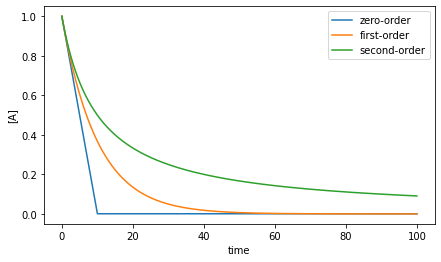

In [6]:
fig, ax = plt.subplots(figsize=(7, 4))

ax.plot(t, A[0], label='zero-order')
ax.plot(t, A[1], label='first-order')
ax.plot(t, A[2], label='second-order')


ax.set_ylabel("[A]")
ax.set_xlabel("time")
ax.legend()

plt.show()

## 반응의 일반해

### 0차 반응

$$-\frac{d[\text{A}]}{dt}=k$$
$$\int \frac{[\text{A}]}{dt}dt=-\int k dt$$

---
 $$[\text{A}]=-kt+[\text{A}]_0$$

### 1차 반응

$$-\frac{d[\text{A}]}{dt}=ka$$

$$-\frac{[\text{A}]'}{[\text{A}]}=k$$

$$\int \frac{[\text{A}]'}{[\text{A}]}dt=-\int k dt$$

$$\ln{[\text{A}]}=-kt+C$$

---

$$[\text{A}]=e^{-kt+\ln{[\text{A}]_0}}$$

### 2차 반응

$$-\frac{d[\text{A}]}{dt}=k[\text{A}]^2$$

$$\int \frac{[\text{A}]'}{[\text{A}]^2}dt=\int -k dt$$

$$-\frac{1}{[\text{A}]} = -kt - C$$

---

$$[\text{A}]=\frac{1}{kt+\frac{1}{[\text{A}]_0}}$$

## 반응의 반감기

* 0차 반응의 경우 $$t_{1/2}=\frac{[\text{A}]_0}{2k}$$
* 1차 반응의 경우 $$t_{1/2}=\frac{\ln{2}}{k}$$
* 2차 반응의 경우 $$t_{1/2}=\frac{1}{k[\text{A}]}$$

In [7]:
for i in range(3):
    for j, a in enumerate(A[i]):
        if a < 1/2:
            print(f"{i}차 반응, 수치값: {t[j]:.3f}", end=', 해석적값: ')
            if i == 0:
                print(f"{1/(2*k):.3f}")
            elif i == 1:
                print(f"{np.log(2)/k:.3f}")
            elif i == 2:
                print(f"{1/k:.3f}")
            break

0차 반응, 수치값: 5.000, 해석적값: 5.000
1차 반응, 수치값: 6.931, 해석적값: 6.931
2차 반응, 수치값: 9.998, 해석적값: 10.000


## 반응 속도에 영향을 미치는 요인

* 반응물질의 특성

* 물리적 상태

* 고체의 표면적(고체에서 표면에 있는 입자만이 반응에 관여할 수 있기 때문)

* **농도**

* **온도**

* 촉매

* 압력

* ...

# 충돌 이론

반응이 일어나기 위해서는 **분자는 충돌**해야하고, **충분한 에너지**를 가지고 있는 상태이어야 한다. 이때 반응이 일어나기 위한 최소한의 에너지를 **활성화 에너지(activation energy)**라 한다.


$$r(T)=Z \rho \exp \left( \frac{-E_\text{a}}{RT} \right)$$

### 충돌수

대부분의 반응에서 온도가 올라갈수록 대부분의 반응 속도는 빨라진다.

이유는 반응 속도는 충돌수와 비례하는데 온도가 증가함에 따라 분자 운동 속도가 증가하고 분자간 충돌 빈도가 증가하여 반응 속도가 증가하기 때문이다.

### 활성화 에너지

온도에 따른 속도에 의해서만 반응이 일어나지 않는다. 충돌 시의 분자의 운동에너지가 부족하면 반응이 일어나지 않는다.

기체 분자의 운동에너지는 온도가 높을수록 높을 확률이 높다. 이는 맥스웰-볼츠만 분포로 확인할 수 있다.

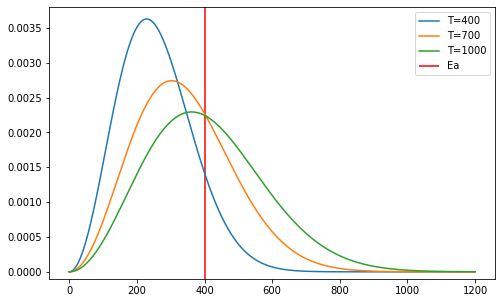

In [8]:
fig, ax = plt.subplots(figsize=(8, 5))

v = np.linspace(0, 1200, 10000, dtype=np.float64)

kB = 1.3806488 * 10**(-23)
m = 127*1.66053904*10**(-27)

T1 = 400
T2 = 700
T3 = 1000


def maxwellboltzman(T):
    return lambda v: 4*np.pi*(m/(2*np.pi*kB*T))**(3/2)*v**2*np.exp((-m*v**2)/(2*kB*T))

mbd1 = maxwellboltzman(T1)
mbd2 = maxwellboltzman(T2)
mbd3 = maxwellboltzman(T3)

ax.plot(v, mbd1(v), label=f'T={T1}')
ax.plot(v, mbd2(v), label=f'T={T2}')
ax.plot(v, mbd3(v), label=f'T={T3}')

ax.vlines(400, -1, 1, color='red', label='Ea')
ax.set_ylim(0-0.0001, 0.0038)

ax.legend()

plt.show()

In [9]:
print(f"T= 400, {integrate.quad(mbd1, 400, 1000)[0]:.5f}")
print(f"T= 700, {integrate.quad(mbd2, 400, 1000)[0]:.5f}")
print(f"T=1000, {integrate.quad(mbd3, 400, 1000)[0]:.5f}")

T= 400, 0.10639
T= 700, 0.32182
T=1000, 0.48391


## 아레니우스 식

속도상수 $k$의 온도 $T$에 대한 의존성을 나타낸 식

$$k=A\exp{\left(-\frac{E_a}{RT}\right)}$$

($A$는 충돌 빈도, $R$은 기체상수, $E_a$는 활성화 에너지)

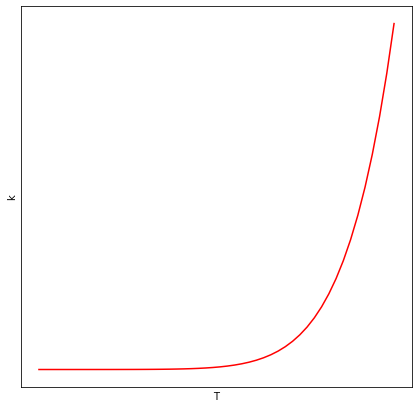

In [11]:
fig, ax = plt.subplots(figsize=(7, 7))

T = np.linspace(400, 800)
R = 8.314
A = 100

ax.plot(T, A*np.exp(-100000/(R*T)), color='red')
ax.set_xlabel("T")
ax.set_ylabel("k")
ax.set_xticks([])
ax.set_yticks([])

plt.show()

이에 더해 반응은 적절한 분자 배향을 가지고 충돌해야 한다. 따라서 배향인자 $p$를 고려해야 한다.

$$k=p A\exp{\left(-\frac{E_a}{RT}\right)}$$